<a href="https://colab.research.google.com/github/hpadhuka/TF2/blob/master/Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [ ]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()
print(diabetes_data["DESCR"])
print(diabetes_data.keys())

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
# Save the input and target variables
training_data = diabetes_data['data']
training_target = diabetes_data['target']
print(training_data.shape)
print(training_target.shape)
print(training_target)


(442, 10)
(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.

In [ ]:
# Normalise the target data (this will make clearer training curves)

training_target = (training_target - training_target.mean(axis=0)) / training_target.std()
print(training_target)

[-1.47194752e-02 -1.00165882e+00 -1.44579915e-01  6.99512942e-01
 -2.22496178e-01 -7.15965848e-01 -1.83538046e-01 -1.15749134e+00
 -5.47147277e-01  2.05006151e+00 -6.64021672e-01 -1.07957508e+00
  3.48889755e-01  4.26806019e-01 -4.43258925e-01  2.45001404e-01
  1.80071184e-01 -1.05621783e-01 -7.15965848e-01  2.06043272e-01
 -1.09256112e+00 -1.33929596e+00 -1.09256112e+00  1.20596866e+00
  4.13819975e-01  6.47568766e-01 -1.96524090e-01 -8.71798376e-01
 -2.74440354e-01  1.69943833e+00 -3.00412442e-01 -1.20943552e+00
  2.45262887e+00 -8.45826288e-01 -1.13151925e+00 -6.51035629e-01
  1.46568953e+00  1.60853602e+00  1.29687096e+00 -8.06868156e-01
 -6.77007716e-01 -1.26137969e+00 -1.18346343e+00 -7.80896068e-01
  1.38777327e+00 -1.28735178e+00  4.91736239e-01 -1.31593871e-01
 -1.00165882e+00 -1.31593871e-01  3.72247006e-02  9.46247777e-01
 -1.20943552e+00 -6.25063541e-01  3.87847887e-01 -3.13398486e-01
 -1.30033783e+00 -1.49512849e+00  2.32015360e-01  2.32015360e-01
 -1.18346343e+00 -1.05621

In [ ]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(training_data, training_target, test_size=0.1)

print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)

(397, 10)
(45, 10)
(397,)


#### Train a feedforward neural network model

In [ ]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(training_data.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
    
    return model
    

In [ ]:
# Print the model summary

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_X, train_Y, validation_split=0.15, epochs=100, batch_size=64, verbose=False)

In [ ]:
# Evaluate the model on the test set

model.evaluate(test_X, test_Y, verbose=2)

2/2 - 0s - loss: 0.5601 - mae: 0.6013


[0.5601240992546082, 0.601341724395752]

#### Plot the learning curves

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

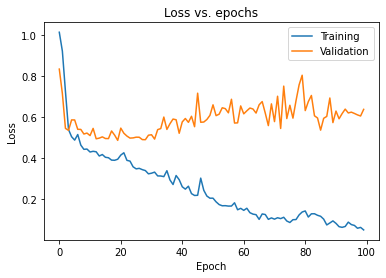

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [1]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

In [ ]:
# Re-build the model with weight decay and dropout layers

def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd), input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dense(1)
    ])
    return model

In [ ]:
# Compile the model



In [ ]:
# Train the model, with some of the data reserved for validation



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [ ]:
# Write a custom callback



In [ ]:
# Re-build the model



In [ ]:
# Compile the model



#### Train the model with the callback

In [ ]:
# Train the model, with some of the data reserved for validation



In [ ]:
# Evaluate the model



In [ ]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()